### Analyses of output files from the pipeline optimus v6.0.0
##### Aim of this part of analysis is to compare 3 methods for Ambient RNA detection: hard thresholding, EmptyDrop and CellBender

#### Load necessary libraries

In [1]:
import scanpy as sc
from cellbender.remove_background.downstream import anndata_from_h5
from upsetplot import from_contents
from upsetplot import UpSet
import dalmatian as dm

#### Data Loading

In this analysis, we load the data from the output file of job (submission ID 94e3d5584-ac31-456a-b046-4c8554108b7d)

In [2]:
TERRA_WS = "whitelabgx/scRNAseq"
wm = dm.WorkspaceManager(TERRA_WS)
output_df = wm.get_sample_sets()
display(output_df)
display(output_df.columns)

,cell_metrics,cellbender_html_report_array,samples,matrix,cellbender_metrics_csv_array,gene_metrics,genomic_reference_version,cellbender_cell_barcodes_csv,aligner_metrics,matrix_row_index,bam,matrix_col_index,h5ad_output_file,cell_calls,cellbender_h5_array,cellbender_summary_pdf
sample_set_id,,,,,,,,,,,,,,,,
optimus_workflow_2023-10-27,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,[gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/...,"[pbmc_10k_v3_S1_L001, pbmc_10k_v3_S1_L002]",gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,[gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,[gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...
optimus_workflow_2023-11-08,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,[gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/...,"[pbmc_10k_v3_S1_L001, pbmc_10k_v3_S1_L002]",gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,[gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,NaN,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...,[gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/...,gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/s...


Index(['cell_metrics', 'cellbender_html_report_array', 'samples', 'matrix',
       'cellbender_metrics_csv_array', 'gene_metrics',
       'genomic_reference_version', 'cellbender_cell_barcodes_csv',
       'aligner_metrics', 'matrix_row_index', 'bam', 'matrix_col_index',
       'h5ad_output_file', 'cell_calls', 'cellbender_h5_array',
       'cellbender_summary_pdf'],
      dtype='object')

h5ad file of optimus (without cellbender correction)

In [6]:
### Load the data locally, more quickly
input_h5ad = "../scAtlas/tmp/10k_pbmc_v3.h5ad"
adata = sc.read_h5ad(input_h5ad)

/opt/homebrew/Caskroom/miniconda/base/envs/bulk/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
adata

AnnData object with n_obs × n_vars = 1136912 × 58347
    obs: 'cell_names', 'CellID', 'emptydrops_Limited', 'emptydrops_IsCell', 'n_reads', 'noise_reads', 'perfect_molecule_barcodes', 'reads_mapped_exonic', 'reads_mapped_exonic_as', 'reads_mapped_intronic', 'reads_mapped_intronic_as', 'reads_mapped_uniquely', 'reads_mapped_multiple', 'duplicate_reads', 'spliced_reads', 'antisense_reads', 'n_molecules', 'n_fragments', 'fragments_with_single_read_evidence', 'molecules_with_single_read_evidence', 'perfect_cell_barcodes', 'reads_mapped_intergenic', 'reads_unmapped', 'reads_mapped_too_many_loci', 'n_genes', 'genes_detected_multiple_observations', 'emptydrops_Total', 'molecule_barcode_fraction_bases_above_30_mean', 'molecule_barcode_fraction_bases_above_30_variance', 'genomic_reads_fraction_bases_quality_above_30_mean', 'genomic_reads_fraction_bases_quality_above_30_variance', 'genomic_read_quality_mean', 'genomic_read_quality_variance', 'reads_per_molecule', 'reads_per_fragment', 'fragments

###### Not all variable names are unique: This indicates that some variables (=genes) appear more than once which can lead to errors or unintended behavior for downstream analysis tasks. We execute the proposed function var_names_make_unique() which makes the variable name unique by appending a number string to each duplicate index element: ‘1’, ‘2’, etc.

In [7]:
### Variable names are not unique. To make them unique
adata.var_names_make_unique()

/opt/homebrew/Caskroom/miniconda/base/envs/bulk/lib/python3.9/site-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


#### Ambient RNA detection comparison

EmptyDrop results and filtering

In [8]:
# Fetch the total number of barcodes
total_nb_barcodes = adata.n_obs

In [9]:
### fetch the rows where the column emptydrops_IsCell is True
emptydrops_IsCell_true = adata.obs.loc[adata.obs.emptydrops_IsCell, :]
#emptydrops_IsCell_true= adata.obs[adata.obs['emptydrops_IsCell'] == True]
emptydrops_IsCell_true_FDR001 = emptydrops_IsCell_true.loc[emptydrops_IsCell_true.emptydrops_FDR < 0.001, :]

print(f"{emptydrops_IsCell_true.shape[0]} barcodes are identified as cells by emptydrops with FDR < 0.01")
print(f"{emptydrops_IsCell_true_FDR001.shape[0]} barcodes are identified as cells by emptydrops with FDR < 0.001")

11031 barcodes are identified as cells by emptydrops with FDR < 0.01
10710 barcodes are identified as cells by emptydrops with FDR < 0.001


In [10]:
# Calculate the barcode surviving pct
cell_contain_cb_pct = emptydrops_IsCell_true.shape[0] * 100 / total_nb_barcodes
print(f"{cell_contain_cb_pct:.2f} % of barcodes survived after emptydrops filtering with FDR < 0.01")


0.97 % of barcodes survived after emptydrops filtering with FDR < 0.01


Hard thresholding and emptyDrops comparison

In [11]:
barcodes_sup500, _ = sc.pp.filter_cells(adata, min_counts=500, inplace=False)
adata_BCsup500 = adata[barcodes_sup500, :]

adata_BCsup500_emptydrops_IsCell_true = adata_BCsup500 .obs.loc[adata_BCsup500.obs.emptydrops_IsCell, :]

adata_BCsup500_emptydrops_IsCell_true_FDR001 = adata_BCsup500_emptydrops_IsCell_true.loc[
    adata_BCsup500_emptydrops_IsCell_true.emptydrops_FDR < 0.001, :
    ]

print(f"{total_nb_barcodes} barcodes in this dataset")
print(f"{adata_BCsup500.shape[0]} barcodes have at least 500 reads")
print(f"{adata_BCsup500_emptydrops_IsCell_true.shape[0]} barcodes have at least 500 reads and identified as cells by emptydrops with FDR < 0.01")
print(f"{adata_BCsup500_emptydrops_IsCell_true_FDR001.shape[0]} barcodes have at least 500 reads and identified as cells by emptydrops with FDR < 0.001")

1136912 barcodes in this dataset
12283 barcodes have at least 500 reads
10757 barcodes have at least 500 reads and identified as cells by emptydrops with FDR < 0.01
10590 barcodes have at least 500 reads and identified as cells by emptydrops with FDR < 0.001


Cellbender results

In [13]:
### Fetch the links of CellBender h5 files from Terra
h5_url = output_df.loc[output_df.index[0], 'cellbender_h5_array']
h5_url

['gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/submissions/4e3d5584-ac31-456a-b046-4c8554108b7d/Optimus/61a7a407-6620-4a45-b7e9-25f5c2a9bf21/call-cellbender_remove_background/cacheCopy/glob-a06ff40aeb9faf0d800aaf11b27f640c/10k_pbmc_v3_out.h5',
 'gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/submissions/4e3d5584-ac31-456a-b046-4c8554108b7d/Optimus/61a7a407-6620-4a45-b7e9-25f5c2a9bf21/call-cellbender_remove_background/cacheCopy/glob-a06ff40aeb9faf0d800aaf11b27f640c/10k_pbmc_v3_out_filtered.h5',
 'gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/submissions/4e3d5584-ac31-456a-b046-4c8554108b7d/Optimus/61a7a407-6620-4a45-b7e9-25f5c2a9bf21/call-cellbender_remove_background/cacheCopy/glob-a06ff40aeb9faf0d800aaf11b27f640c/10k_pbmc_v3_out_posterior.h5']

In [4]:
# Load data
adata_cellbender_out_filtered = anndata_from_h5('/Users/xiliu/Documents/analysis/terraPipelines/scAtlas/tmp/10k_pbmc_v3_out_filtered.h5')
adata_cellbender_out = anndata_from_h5('/Users/xiliu/Documents/analysis/terraPipelines/scAtlas/tmp/10k_pbmc_v3_out.h5')
adata_cellbender_out_filtered_defaultParameter = anndata_from_h5('/Users/xiliu/Documents/analysis/terraPipelines/scAtlas/tmp/10k_pbmc_v3_out_filtered_cellbenderDefault.h5')

display(adata_cellbender_out_filtered)
display(adata_cellbender_out)
display(adata_cellbender_out_filtered_defaultParameter)


Assuming we are loading a "filtered" file that contains only cells.


/opt/homebrew/Caskroom/miniconda/base/envs/bulk/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/bulk/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


Assuming we are loading a "filtered" file that contains only cells.


/opt/homebrew/Caskroom/miniconda/base/envs/bulk/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 3605 × 58347
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'barcode_indices_for_latents', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

AnnData object with n_obs × n_vars = 4118 × 58347
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

AnnData object with n_obs × n_vars = 12561 × 58347
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'barcode_indices_for_latents', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

In [16]:
adata_cellbender_out.var

,ambient_expression,feature_type,genome,gene_id,cellbender_analyzed
gene_name,,,,,
DDX11L1,0.000000,NA,NA,ENSG00000223972.5,False
WASH7P,0.000000,NA,NA,ENSG00000227232.5,False
MIR6859-1,0.000000,NA,NA,ENSG00000278267.1,False
MIR1302-2HG,0.000000,NA,NA,ENSG00000243485.5,False
MIR1302-2,0.000000,NA,NA,ENSG00000284332.1,False
...,...,...,...,...,...
AC007325.1,0.000000,NA,NA,ENSG00000276017.1,False
AC007325.4,0.000002,NA,NA,ENSG00000278817.1,True
AC007325.2,0.000000,NA,NA,ENSG00000277196.4,False


In [17]:
adata_cellbender_out.obs

,background_fraction,cell_probability,cell_size,droplet_efficiency
barcode,,,,
TGCTTGCTCTAAGCCA,0.066727,0.999955,36923.042969,2.498647
AATCACGTCCCGATCT,0.130501,0.999955,26296.291016,2.491069
TTCCTTCAGTCTCCTC,0.109683,0.999955,25463.599609,2.469484
CTTGAGATCCATGCAA,0.115368,0.999955,25576.208984,2.452932
TCATTACCAGCTCATA,0.134150,0.999955,22964.462891,2.399945
...,...,...,...,...
CTGATCCCAGTCAGCC,0.000000,0.012916,11271.076172,1.048951
GGTGTCGAGCGGGTTA,0.701669,0.992517,17560.492188,0.568851
CTCAAGACAGTGCCTG,0.000000,0.028803,10847.955078,1.148832


comparison between 3 methods and their 5 results

###### expected cells parameter of Cellbender at 500

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

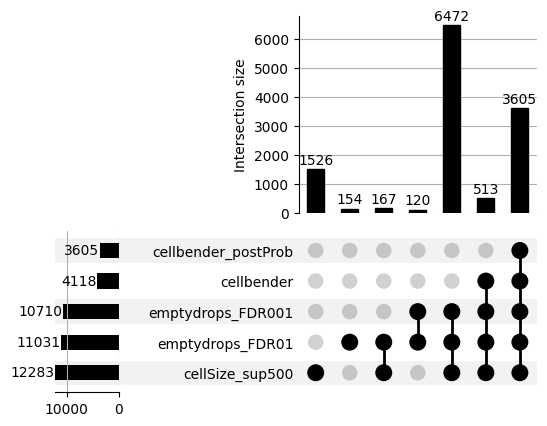

In [18]:
emptydrops_FDR01 = emptydrops_IsCell_true.index.to_list()
emptydrops_FDR001 = emptydrops_IsCell_true_FDR001.index.to_list()
cellSize_sup500 = adata_BCsup500.obs.index.to_list()
cellbender = adata_cellbender_out.obs.index.to_list()
cellbender_postProb = adata_cellbender_out_filtered.obs.index.to_list()
(emptydrops_FDR01, emptydrops_FDR001, cellSize_sup500, cellbender, cellbender_postProb)


IsCell = from_contents({'emptydrops_FDR01': emptydrops_FDR01,
                             'emptydrops_FDR001': emptydrops_FDR001,
                             'cellSize_sup500': cellSize_sup500,
                             'cellbender': cellbender,
                             'cellbender_postProb': cellbender_postProb})

UpSet(IsCell, subset_size='count', show_counts=True).plot()

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

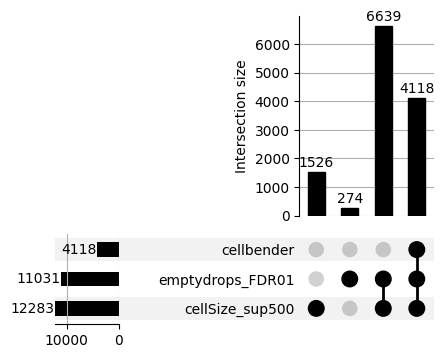

In [19]:
emptydrops_FDR01 = emptydrops_IsCell_true.index.to_list()
cellSize_sup500 = adata_BCsup500.obs.index.to_list()
cellbender = adata_cellbender_out.obs.index.to_list()
(emptydrops_FDR01, cellSize_sup500, cellbender,)


IsCell_lax = from_contents({'emptydrops_FDR01': emptydrops_FDR01,
                             'cellSize_sup500': cellSize_sup500,
                             'cellbender': cellbender,})

UpSet(IsCell_lax, subset_size='count', show_counts=True).plot()

###### expected cells parameter of Cellbender by default: result in optimus_workflow_2023-11-08
###### gs://fc-447aee29-8362-4c0b-b8d0-b3b10eb9e2a6/submissions/c9f1ae21-46d0-4349-a049-0b9987dea21b/Optimus/b5d3da5c-d93a-4323-a3b3-774742c89460/call-cellbender_remove_background/attempt-2/glob-a06ff40aeb9faf0d800aaf11b27f640c/10k_pbmc_v3_out_filtered.h5

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

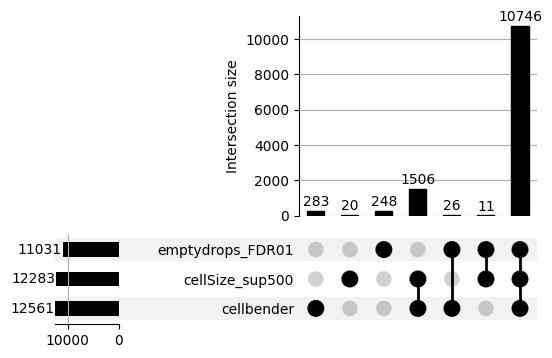

In [15]:
emptydrops_FDR01 = emptydrops_IsCell_true.index.to_list()
cellSize_sup500 = adata_BCsup500.obs.index.to_list()
cellbender_filtered_defaultParameter = adata_cellbender_out_filtered_defaultParameter.obs.index.to_list()
(emptydrops_FDR01, cellSize_sup500, cellbender_filtered_defaultParameter)


IsCell_lax = from_contents({'emptydrops_FDR01': emptydrops_FDR01,
                             'cellSize_sup500': cellSize_sup500,
                             'cellbender': cellbender_filtered_defaultParameter,})

UpSet(IsCell_lax, subset_size='count', show_counts=True).plot()